# Project: Wrangling and Analyze Data

In [13]:
# Importing All Libraries

import pandas as pd
import numpy as np
import tweepy
import timeit
import matplotlib.pyplot as plt
import requests
import json
from IPython.display import Image


## Data Gathering
In the cell below, **all** the three pieces of data for this project are gathered and loaded into this notebook. 

### 1. Downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

> First, the above data will be downloaded from [here]( https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv) to my directory and then pd.read_csv() can be used to load this data into a Panda DataFrame in my notebook.

In [14]:
#Loading twitter archive data into the data frame

archive_df = pd.read_csv('twitter_archive_enhanced.csv')

### 2. Using the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

#saving this tsv file on my local machine

with open('image_predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [5]:
#We now load image_predictions.tsv into the notebook

image_df = pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
#saving this file in csv form in my local machine

image_df.to_csv('image_predictions.csv', index = False)

new_image_df = pd.read_csv('image_predictions.csv')

### 3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

> The above data will be downloaded Manually as given in the classroom. The codes in the next cell is provided in the classroom

In [7]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

#I want to define a function for extracting the tweet

def tweet_extract():
    count = o
    falls_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)
    

> Using the tweepy library, the next lines of code will read the **tweet_json.txt** file line by line to extract the data we need from this json file and then we will store this in a data frame called **extracted_df_data**


In [9]:
#This code creates a list for the dataframe

data = []

#The code below opens the json file and reads it line by line
#Each line of code here shows a JSON Object

with open("tweet_json.txt", 'r') as json_file:
    for line in json_file:
        line_data = json.loads(line)
        
        #the data ('id', 'favorite_count', and 'retweet_counts') will be used to form the column
        tweet_id = line_data["id"]
        favorite_count = line_data["favorite_count"]
        retweet_count = line_data["retweet_count"]
  
        
        #Next is put all these data we have extracted into the a list
        
        data.append({'tweet_id': tweet_id, 'favorite_count': favorite_count, 
                     'retweet_count': retweet_count})
        
        
        
#then put the above list in a dataframe
        
tweet_df = pd.DataFrame(data,columns=["tweet_id", "favorite_count", "retweet_count"])

tweet_df.head()


,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [10]:
#Save data in csv format

tweet_df.to_csv('jason_data.csv', index = False)

new_tweet_df = pd.read_csv('jason_data.csv')

## Assessing Data

In this section, I will detect and document at least **eight (8) quality issues and two (2) tidiness issue**. and will use **both** visual and programmatic assessement to assess the data.

Do note that in this dataset, not all tweets are dog ratings, some and some are just retweets, hence, I only want original ratings (no retweets) that have images. Also, I will not gather the tweets beyond August 1st, 2017.


*Assessing data (archive_df, image_df,new_tweet_df) Visually*

In [81]:
#reading archive_df

archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [82]:
#reading image_df

image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [83]:
#reading new_tweet_df

new_tweet_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


> *Assessing data (archive_df, image_df,new_tweet_df) Programatically for quality and tideness issues using .info*

In [84]:
#See summary of archive_df

archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [85]:
#See summary of image_df

image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [86]:
#See summary of new_tweet_df

new_tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


> *Assessing descriptive statistics of data (archive_df, image_df,new_tweet_df) using .describe()*

In [87]:
#Descriptive statistics of archive_df

archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [88]:
#Descriptive statistics of image_df

image_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [89]:
#Descriptive statistics of new_tweet_df

new_tweet_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


> *Assessing data (archive_df, image_df,new_tweet_df) non-direct programatically using .sample*

In [90]:
#Assessing archive_df

archive_df.sample(6)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2295,667119796878725120,NaN,NaN,2015-11-18 23:18:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He is a southern Baklava. Gabe h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667119796...,10,10,Gabe,None,None,None,None
1504,691820333922455552,NaN,NaN,2016-01-26 03:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brockly. He's an uber driver. Falls as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691820333...,8,10,Brockly,None,None,None,None
538,806620845233815552,NaN,NaN,2016-12-07 22:06:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Idk why this keeps happening. W...,7.815247e+17,4.196984e+09,2016-09-29 16:03:01 +0000,https://twitter.com/dog_rates/status/781524693...,12,10,None,None,None,None,None
1085,738184450748633089,NaN,NaN,2016-06-02 01:44:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For the last time, we only rate dogs. Pls stop...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/738184450...,9,10,None,None,None,None,None
1393,700029284593901568,NaN,NaN,2016-02-17 18:49:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. His ship is taking on water. So...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/700029284...,10,10,Coops,None,None,None,None
1289,708149363256774660,NaN,NaN,2016-03-11 04:35:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jebberson. He's the reigning hide and ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708149363...,10,10,Jebberson,None,None,None,None


In [91]:
#Assessing image_df

image_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1114,724771698126512129,https://pbs.twimg.com/media/Cg7n_-OU8AA5RR1.jpg,2,German_short-haired_pointer,0.835491,True,bluetick,0.058788,True,English_setter,3.720830e-02,True
10,666063827256086533,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1,golden_retriever,0.775930,True,Tibetan_mastiff,0.093718,True,Labrador_retriever,7.242660e-02,True
891,699370870310113280,https://pbs.twimg.com/media/CbSqE0rVIAEOPE4.jpg,1,cairn,0.337557,True,Chihuahua,0.209130,True,Border_terrier,1.369460e-01,True
521,676575501977128964,https://pbs.twimg.com/media/CWOt07EUsAAnOYW.jpg,1,feather_boa,0.424106,False,Yorkshire_terrier,0.073144,True,Shetland_sheepdog,5.759760e-02,True
997,708356463048204288,https://pbs.twimg.com/media/CdSWcc1XIAAXc6H.jpg,2,pug,0.871283,True,French_bulldog,0.041820,True,bath_towel,1.522800e-02,False
883,698907974262222848,https://pbs.twimg.com/media/CbMFFssWIAAyuOd.jpg,3,German_short-haired_pointer,0.983131,True,bluetick,0.005558,True,curly-coated_retriever,3.322210e-03,True
1443,775729183532220416,https://pbs.twimg.com/media/CsPxk85XEAAeMQj.jpg,1,web_site,0.989407,False,hand-held_computer,0.002139,False,menu,2.115360e-03,False
1853,840696689258311684,https://pbs.twimg.com/media/C6rBLenU0AAr8MN.jpg,1,web_site,0.841768,False,rule,0.007087,False,envelope,6.820300e-03,False
149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False
1501,784431430411685888,https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg,1,miniature_poodle,0.744819,True,toy_poodle,0.243192,True,standard_poodle,1.092020e-02,True


In [92]:
#Assessing new_tweet_df

new_tweet_df.sample(20)

,tweet_id,favorite_count,retweet_count
1303,707387676719185920,3835,1490
2105,670465786746662913,1048,608
884,759943073749200896,6581,2382
1811,676776431406465024,5405,2249
700,786051337297522688,1614,179
261,842765311967449089,7321,1439
479,815736392542261248,10937,2625
1576,687317306314240000,22073,10411
1831,676146341966438401,2077,744
2119,670408998013820928,600,249


> checking for missing data in archive_df

In [93]:
archive_df.isnull()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False


In [94]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

> checking for missing data in image_df

In [95]:
image_df.isnull()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,False,False,False,False,False,False,False,False,False,False,False,False
2071,False,False,False,False,False,False,False,False,False,False,False,False
2072,False,False,False,False,False,False,False,False,False,False,False,False
2073,False,False,False,False,False,False,False,False,False,False,False,False


In [96]:
image_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

> checking for missing data in new_tweet_df

In [97]:
new_tweet_df.isnull()

,tweet_id,favorite_count,retweet_count
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
2349,False,False,False
2350,False,False,False
2351,False,False,False
2352,False,False,False


In [98]:
new_tweet_df.isnull().sum()

tweet_id          0
favorite_count    0
retweet_count     0
dtype: int64

> *Checking for duplicates in the data set*

In [15]:
total_columns_check = pd.Series(list(archive_df) + list(image_df) + list(new_tweet_df))

total_columns_check[total_columns_check.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [100]:
archive_df[archive_df.expanded_urls.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
75,878281511006478336,NaN,NaN,2017-06-23 16:00:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. In an attempt to reach maximum zo...,NaN,NaN,NaN,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286,667182792070062081,NaN,NaN,2015-11-19 03:29:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timison. He just told an awful joke bu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667182792...,10,10,Timison,None,None,None,None
2293,667152164079423490,NaN,NaN,2015-11-19 01:27:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pipsy. He is a fluffball. Enjoys trave...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667152164...,12,10,Pipsy,None,None,None,None
2294,667138269671505920,NaN,NaN,2015-11-19 00:32:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Extremely intelligent dog here. Has learned to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None


> Checking for dog names in our dataset

In [101]:
archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

> *checking to know whether archive_df has some retweet data*

In [16]:
len(archive_df[archive_df.retweeted_status_id.isnull() == False])

181

### Quality issues

> *Based on the assesments in the previous cells, we can see note the following issues:*

#### Validity Issues (in archive_df)

* There are retweet Values we do not need



* In the source column some Values are showing as hyperlinks instead of URL



* There are missing values in the expanded_url columns



* Some Dog names in archive_df name column are written as 'a' which connotates no meaning



* Some Tweets had no pictures

#### Level of Accuracy

* Wrong Data type in: tweet_id; in_reply_to_status_id; in_relpy_to_user_id; retweeted_status_id; retweeted_status_timestamp; retweeted_status_user_id.



* The Dataset contains data beyond 8/01/2017



* image_df has some non-descriptive variable name such as p1, p1_dog, p1_conf, p2, p2_dog p2_conf, p3. p3_dog, and p3_conf.

#### Completeness

* archive_df has missing values in several columns

#### Consistency

* Some dog names are in Upper case, while some are in Lower case


* some names are separated with underscore while some are not

### Tidiness issues

* we can merge tables in archive_df with those of new_tweet_df and image_df


* There are four columns (doggo, flooter, pupper, puppo) in archive_df which should belong to one Variable 'dog stage'

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [17]:
# Making copies of original pieces of data

new_archive_df = archive_df.copy()

new_image_df = image_df.copy()

new_tweet_df_1 = new_tweet_df.copy()


### Issue #1:  Retweet Values we do not need

> *Here we will remove retweet and replies because focus is on original data*

#### Code

In [18]:
new_archive_df = new_archive_df[np.isnan(new_archive_df.retweeted_status_id)]

#### Test

In [19]:
new_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

> *column 6, 7, and 8 will be removed from the dataset.*

In [20]:
new_archive_df = new_archive_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [21]:
new_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  doggo                  2175 non-null   object 
 11  floofer                2175 non-null   object 
 12  pupper                 2175 non-null   object 
 13  puppo                  2175 non-null   object 
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ 

> *retweeted_status_id; retweeted_status_user_id and  retweeted_status_timestamp has been successfully removed!*

### Issue #2: Removing Columns with Missing Values

#### Define

> *columns with null values will aslo be removed because we only want to work with column with value, hence column 1 and 2 in th e previous cell will not be relevant to us*

#### Code

In [ ]:
new_archive_df.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], axis = 1, inplace = True)

#### Test

In [23]:
new_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


> *in_reply_to_status_id and in_reply_to_user_id has been successfully removed!*

In [110]:
new_archive_df.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         58
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

### Issue #3: Some values are showing as hyperlinks instead of URL

#### Define

> *Remove hyperlinks from the source column of new_archive_df using extract() and regex *

#### Code

In [24]:
pattern = r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%._+~#=]*)'

new_archive_df.source = new_archive_df.source.str.extract(pattern, expand = False)

#### Test

In [26]:
#checking to 
new_archive_df.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,http://twitter.com,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Issue #4: Missing Values in the expanded_url column (new_archive_df)

#### Define

> *Since we cannot ascertain those missing Values. we can drop the null values in the column*

#### Code

In [27]:
new_archive_df.dropna(inplace=True)

#### Test

In [28]:
new_archive_df.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

### Issue #5: (new_archive_df) The Dataset contains data beyond 8/01/2017

#### Define

> *All data beyond 8/01/2017 will be removed from our dataset*

**Code**

In [29]:
start_counts = len(new_archive_df)
new_archive_df = new_archive_df[(new_archive_df.timestamp <"2017-08-02")]
end_counts = len(new_archive_df)
removed_counts = start_counts - end_counts

**Test**

In [30]:
new_archive_df[new_archive_df.timestamp > "2017-08-02"]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #6: Inconsistency in the dog names in new_image_df.

#### Define

> *Some dog names in the p1, p2, p3 column in new_image_df are separeted by underscore while some are not, some are also in upper case while others are not. For uniformity and consistencey,  underscores in dog names will be removed and replaced by just space, and all names will start in lower case.*

#### Code

In [31]:
new_image_df['p1'] = new_image_df['p1'].str.replace('_',' ').str.lower()

new_image_df['p2'] = new_image_df['p2'].str.replace('_',' ').str.lower()

new_image_df['p3'] = new_image_df['p3'].str.replace('_',' ').str.lower()

#### Test

In [118]:
new_image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #7: Non Descriptive column names in new_image_df

#### Define

> *Column names such as p1,p1_conf,p1_dog, p2,p2_conf,p2_dog, p3, p3_conf, p3_dog are not descriptive in nature. A first glance at the names will not tell us what that column means. We will change the column names to reflect thieir meaning. 'P' here meand probability, thus, p1 will meand the 'First Probability'*

#### Code

In [32]:
new_image_df.rename(columns = {'p1':'first_probability', 'p1_conf':'probability_conf1', 'p1_dog': 'for_dog_1',\
                             'p2':'second_probability', 'p2_conf':'probability_conf2', 'p2_dog': 'for_dog_2',\
                             'p3':'third_probability', 'p3_conf':'probability_conf3', 'p3_dog': 'for_dog_3'}, inplace = True)

#### Test

In [120]:
new_image_df.head()

,tweet_id,jpg_url,img_num,first_probability,probability_conf1,for_dog_1,second_probability,probability_conf2,for_dog_2,third_probability,probability_conf3,for_dog_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


### Issue #8: Some Dog names in archive_df name column are written as 'a' which connotates no meaning

#### Define

> *We will set this 'a' value to NaN and then drop them*

#### Code

In [33]:
#(1) setting 'a' value to NaN

new_archive_df['name'] = new_archive_df['name'].replace('a', np.NaN)

#(2) All missing values in name column will be changed to 'NaN'

new_archive_df['name'] = new_archive_df['name'].replace('None', np.NaN)

#(3) These 'NaN' Values will be dopped

new_archive_df.dropna(inplace = True)

#### Test

In [34]:
new_archive_df.name.isnull().sum()

0

### Issue #9: Wrong Data type in: tweet_id; in_reply_to_status_id; in_relpy_to_user_id; retweeted_status_id; retweeted_status_timestamp; retweeted_status_user_id

#### Define

> *We will only change the timestamp datatype since all other columns with this issue has been dropped*

#### Code

In [35]:
new_archive_df.timestamp = pd.to_datetime(new_archive_df.timestamp)

#### Test

In [36]:
new_archive_df.dtypes

tweet_id                            int64
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

### Tidiness Issues

### Issue #1: Merging Table from  new_archive_df and new_tweet_df_1 to new_image_df

#### Define

> *we will merge the new_archive_df table with new_tweet_df_1 table and then merge this with new_image_df*

#### Code

In [37]:
#merging the new_archive_df tweet_id table with new_tweet_df_1 tweet_id table

new_archive_df = new_archive_df.merge(new_tweet_df_1, how = 'left', left_on = 'tweet_id', right_on = 'tweet_id')

#merging the above with new_image_df

new_archive_df = new_archive_df.merge(new_image_df,'left', left_on = 'tweet_id', right_on = 'tweet_id')

#### Test

In [149]:
new_archive_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count_x,retweet_count_x,...,img_num_y,first_probability_y,probability_conf1_y,for_dog_1_y,second_probability_y,probability_conf2_y,for_dog_2_y,third_probability_y,probability_conf3_y,for_dog_3_y
0,892420643555336193,2017-08-01 16:23:56 +0000,http://twitter.com,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,...,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,...,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,http://twitter.com,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,...,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,http://twitter.com,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,...,2,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True


### Issue #2: floofer, pupper, doggo, and puppo column in new_archive_df should be under a single variable 

#### Define

> *we will put flooter, puppo, pupper, and doggo into one single variable "dog stage"*

#### code

In [38]:
#First, collect the list of column we need

needed_columns = ['doggo', 'floofer','pupper', 'puppo']

new_archive_df[needed_columns] =  new_archive_df[needed_columns].replace('None', '')

#next, puul these values into one column

new_archive_df['dog_stage'] = new_archive_df.doggo + new_archive_df.floofer + new_archive_df.pupper + new_archive_df.puppo

new_archive_df.loc[new_archive_df.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'

new_archive_df.loc[new_archive_df.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

new_archive_df.loc[new_archive_df.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'

#then,using .drop function, original four columns will be dropped

new_archive_df.drop(columns = needed_columns, inplace = True)

#### Test

In [133]:
new_archive_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,...,first_probability,probability_conf1,for_dog_1,second_probability,probability_conf2,for_dog_2,third_probability,probability_conf3,for_dog_3,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,http://twitter.com,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,39467,8853,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,
1,892177421306343426,2017-08-01 00:17:27 +0000,http://twitter.com,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,33819,6514,...,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,
2,891815181378084864,2017-07-31 00:18:03 +0000,http://twitter.com,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,25461,4328,...,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,
3,891689557279858688,2017-07-30 15:58:51 +0000,http://twitter.com,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,42908,8964,...,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,
4,891327558926688256,2017-07-29 16:00:24 +0000,http://twitter.com,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,41048,9774,...,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,


### Other Quality Issue: Some Tweets had no pictures 

#### Define

> *I will remove all the tweets that does not have pictures in new_archive_df*

#### Code

In [39]:
new_archive_df = new_archive_df.dropna(subset = ['jpg_url'])

#### Test

In [40]:
new_archive_df.shape

(1393, 22)

#### we can now check how our data looks like now

In [41]:
new_archive_df.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
favorite_count        0
retweet_count         0
jpg_url               0
img_num               0
first_probability     0
probability_conf1     0
for_dog_1             0
second_probability    0
probability_conf2     0
for_dog_2             0
third_probability     0
probability_conf3     0
for_dog_3             0
dog_stage             0
dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [52]:
new_archive_df.to_csv('twitter_archive_master.csv', index = False)

## Analyzing and Visualizing Data
In this section, I will analyze and visualize my wrangled data and produce at least **three (3) insights and one (1) visualization.**

In [53]:
#First, lets load our cleaned data into datafram

df = pd.read_csv('twitter_archive_master.csv')

### Insights #1: Do dog names with high favorite count get more retweet count?

In [64]:
#Here is the mean of Favorite count

df.favorite_count.mean()

9425.084709260589

#### Let's split the data into more and less Favorable

In [61]:

more_favorable = df.query('favorite_count >= 8895.7')

less_favorable = df.query('favorite_count < = 8895.7')


In [62]:
#Mean of more_favorable

print (more_favorable.retweet_count.mean())

5964.532224532225


In [63]:
#Mean of less_favorable

print (less_favorable.retweet_count.mean())

1091.7258771929824


> *From the above calculations, we can see that Dogs with more favorite count stands a chance to be retweeted more compared to Dogs with less favorite count. People will retweet Dogs with more favorite count.*

### Insights #2: Number of Dogs with the highest rating ?

In [58]:
df['rating_numerator'].value_counts().sort_index()

1         1
2         5
3        10
4         5
5        14
6        18
7        33
8        73
9       105
10      283
11      306
12      335
13      179
14       20
24        1
27        1
50        1
75        1
204       1
1776      1
Name: rating_numerator, dtype: int64

In [65]:
df['rating_numerator'][df['rating_numerator'] > 10].value_counts().sum()

846

a total of 846 dogs were rated above 10. This is greater than 60% of the total dogs rated.

### Insights #3: which dog stage records the highest count?

In [57]:
df.dog_stage.value_counts()

pupper           122
doggo             38
puppo             15
floofer            5
doggo, pupper      5
Name: dog_stage, dtype: int64

From the above calculations, we see that pupper records the highest counts with 122 and doggo following behind.

## Visualization

### Visualization #1:  Is there a correlation between retweet count and favorite count?

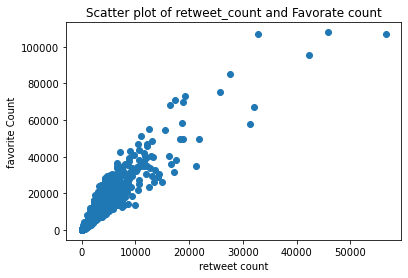

In [56]:
plt.scatter(df.retweet_count,df.favorite_count)

plt.title('Scatter plot of retweet_count and Favorate count')
plt.ylabel('favorite Count')
plt.xlabel('retweet count')
plt.show()

> There is Positive correlation between retweet count and favorite count

### Visualization #2:  Ratings with the most retweets?

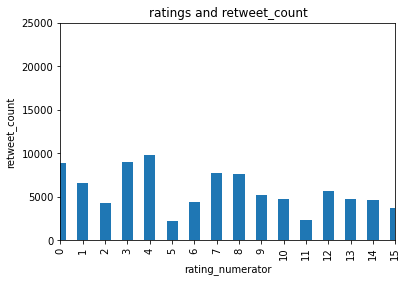

In [55]:
df['retweet_count'].plot(kind = 'bar');

plt.xlim(0, 15);
plt.ylim(0, 25000);
plt.xlabel('rating_numerator');
plt.ylabel('retweet_count');
plt.title('ratings and retweet_count');

The plot above shows that the rating 4 has the most amount of retweet count.

### Visualization #3:  6 Most Common Dog names

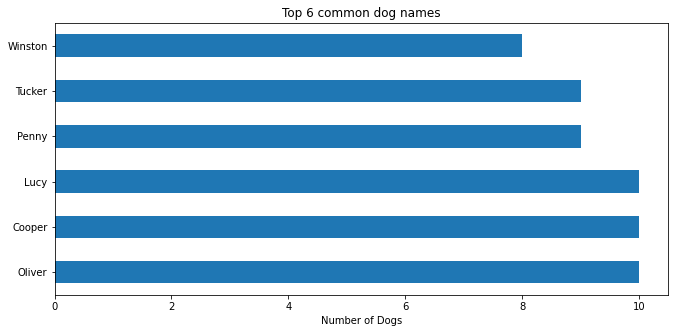

In [54]:
df.name.value_counts()[1:7].plot(kind = 'barh', figsize=(11,5), title='Top 6 common dog names').set_xlabel("Number of Dogs")
plt.savefig('dog_names')

> The Plot above shows that **Oliver, Cooper, Lucy, Tucker, Penny, and Winston** are **top 6** common dog names used in this dataset